In [1]:
!pip install transformers
!pip install torchtext


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
dev = pd.read_csv('val.csv')
test = pd.read_csv('test.csv')


train['text'] = train['text'].astype(str)
X_train = train['text']
y_train = train["label"]

dev['text'] = dev['text'].astype(str)
X_valid = dev['text']
y_valid = dev['label']

test['text'] = test['text'].astype(str)
X_test = test['text']
y_test = test['label']

In [2]:
import torch
from torchtext import data
from torchtext import datasets
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

torch.cuda.is_available()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchtext\datasets\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


False

In [3]:
import pandas as pd
from glob import glob

train_sentences = list(train['text'].values)
train_labels = list(train['label'].values)

dev_sentences = list(dev['text'].values)
dev_labels = list(dev['label'].values)

test_sentences = list(test['text'].values)
test_labels = list(test['label'].values)

In [6]:
train_labels[:10]

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
#choose max_length for phobert model based on the input length

max_length = 0
list_len=[]
for sentence in train_sentences:
    length = len(tokenizer.tokenize(sentence))
    list_len.append(length)

from collections import Counter
Counter(list_len).most_common(100)


[(4, 3302),
 (5, 3270),
 (6, 3204),
 (3, 2984),
 (7, 2835),
 (8, 2602),
 (9, 2247),
 (2, 2242),
 (10, 1952),
 (11, 1623),
 (12, 1384),
 (13, 1225),
 (14, 1085),
 (15, 946),
 (16, 837),
 (17, 762),
 (1, 756),
 (18, 698),
 (19, 645),
 (20, 590),
 (21, 554),
 (23, 520),
 (22, 504),
 (24, 435),
 (26, 416),
 (25, 396),
 (27, 392),
 (28, 354),
 (29, 341),
 (30, 327),
 (31, 317),
 (32, 308),
 (33, 295),
 (41, 273),
 (37, 268),
 (34, 266),
 (36, 265),
 (42, 250),
 (35, 249),
 (40, 245),
 (39, 241),
 (38, 214),
 (43, 213),
 (48, 211),
 (45, 211),
 (44, 207),
 (46, 207),
 (47, 182),
 (50, 175),
 (49, 169),
 (52, 165),
 (51, 163),
 (54, 161),
 (56, 158),
 (57, 152),
 (53, 147),
 (58, 143),
 (59, 136),
 (55, 134),
 (61, 125),
 (64, 118),
 (60, 115),
 (62, 110),
 (63, 108),
 (65, 108),
 (71, 99),
 (69, 96),
 (67, 95),
 (70, 91),
 (68, 89),
 (72, 86),
 (66, 82),
 (75, 81),
 (74, 80),
 (73, 79),
 (84, 78),
 (77, 69),
 (78, 69),
 (83, 67),
 (81, 64),
 (76, 63),
 (87, 61),
 (79, 59),
 (86, 59),
 (80, 5

In [13]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base-v2')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_labels)
encoded_labels = le.transform(train_labels)
encoded_dev_labels = le.transform(dev_labels)

In [7]:
len(le.classes_)

2

In [28]:
def encoder_generator(sentences,labels):
    
    sent_index = []
    input_ids = []
    attention_masks =[]

    for index,sent in enumerate(sentences):
        
        sent_index.append(index)
        
        encoded_dict = tokenizer.encode_plus(sent,
                                             add_special_tokens=True,
                                             max_length=20,
                                             pad_to_max_length=True,
                                             truncation = True,
                                             return_attention_mask=True,
                                             return_tensors='pt')        
        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids,dim=0)
    attention_masks = torch.cat(attention_masks,dim=0)
    labels = torch.tensor(labels)
    sent_index = torch.tensor(sent_index)

    return sent_index,input_ids,attention_masks,labels

train_sent_index,train_input_ids,train_attention_masks,train_encoded_label_tensors = encoder_generator(train_sentences,encoded_labels)
dev_sent_index,dev_input_ids,dev_attention_masks,dev_encoded_label_tensors = encoder_generator(dev_sentences,encoded_dev_labels)
print('Original: ', train_sentences[0])
print('Token IDs:', train_input_ids[0])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  trần huỳnh dơ đi
Token IDs: tensor([    0,  2834, 52111, 28590,    57,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1])


In [29]:
print('Original: ', train_sentences[:10])
print('Token IDs:', train_input_ids[:10])

Original:  ['trần huỳnh dơ đi', 'phương august =))))', 'hcm hôm_nay (4.3). mỹ tự_hào đối_tác việt_nam phòng_chống covid-19 knaper, thiết_bị góp_phần tăng_cường năng_lực việt_nam phòng_chống covid-19', 'triệt_phá đường_dây mua_bán vũ_khí youtube, 5 2.000 đơn hàng mới_đây, công_an tỉnh thanh_hoá phối_hợp cục cảnh_sát hình_sự, công_an công_an tp.hcm triệt_phá đường_dây mua_bán, tàng_trữ trái_phép vũ_khí quân_dụng, vũ_khí thể_thao, công_cụ hỗ_trợ không_gian mạng', 'dính: (', 'đợt toàn tầng_lớp đại_gia nhờ.có tiền đi du_lịch kug khổ', 'this girl my is rude evil and wicked in every way and in every episode, she comes in. duong & toan is the best most amazing couple. love watching old episode.', 'tiểu_thư xinh_đẹp lạ quét sơn váy kết xem phim tập trọn nha (99):', 'chúc thầy 2011', 'minh ngọc hết_hồn?']
Token IDs: tensor([[    0,  2834, 52111, 28590,    57,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1],
        [    0,  1607, 

In [30]:
# Connvert train, dev input by using TensorDataset

from torch.utils.data import TensorDataset,random_split

train_dataset = TensorDataset(train_input_ids,train_attention_masks,train_encoded_label_tensors)
dev_dataset = TensorDataset(dev_input_ids,dev_attention_masks,dev_encoded_label_tensors)

print('train data samples is {}'.format(len(train_dataset)))
print("valid data samples is {}".format(len(dev_dataset)))

train data samples is 49321
valid data samples is 6165


In [31]:
from torch.utils.data import DataLoader,RandomSampler,SequentialSampler

bs=32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data_loader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=bs)
valid_data_loader = DataLoader(dev_dataset,
                              sampler=RandomSampler(dev_dataset),
                              batch_size=bs)

In [32]:
from transformers import AutoModel

phoBert = AutoModel.from_pretrained('vinai/phobert-base-v2')
phoBert = phoBert.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.fc_input = nn.Linear(embedding_dim,embedding_dim)
        
        self.conv_0 = nn.Conv1d(in_channels = embedding_dim, 
                                out_channels = n_filters, 
                                kernel_size = filter_sizes[0])
        
        self.conv_1 = nn.Conv1d(in_channels = embedding_dim, 
                                out_channels = n_filters, 
                                kernel_size = filter_sizes[1])
        
        self.conv_2 = nn.Conv1d(in_channels = embedding_dim, 
                                out_channels = n_filters, 
                                kernel_size = filter_sizes[2]) 
        self.conv_3 = nn.Conv1d(in_channels = embedding_dim, 
                                out_channels = n_filters, 
                                kernel_size = filter_sizes[3])

        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, encoded):
                
        #embedded = [batch size, sent len, emb dim]
        embedded = self.fc_input(encoded)
        #print(embedded.shape)
        
        embedded = embedded.permute(0, 2, 1)
        #print(embedded.shape)
        conved_0 = F.relu(self.conv_0(embedded))
        conved_1 = F.relu(self.conv_1(embedded))
        conved_2 = F.relu(self.conv_2(embedded))
        conved_3 = F.relu(self.conv_3(embedded))
            
        #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]
        
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        pooled_3 = F.max_pool1d(conved_3, conved_3.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_fibatlters]
        
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2, pooled_3), dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        result =  self.fc(cat)
        
        #print(result.shape)
        
        return result

In [34]:
# Hyperparameters

EMBEDDING_DIM = 768 
N_FILTERS = 32
FILTER_SIZES = [1,2,3,5]
OUTPUT_DIM = len(le.classes_)
DROPOUT = 0.1
PAD_IDX = tokenizer.pad_token_id

cnn = CNN(EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
cnn = cnn.to(device)

Thiết lập optimizer Adam cho mô hình, kết hợp các tham số từ cả PhoBERT và CNN.
 Khởi tạo hàm mất mát Cross Entropy, thường được sử dụng cho các bài toán phân loại đa lớp.
Hàm mất mát cũng được chuyển sang thiết bị tính toán để sẵn sàng cho quá trình huấn luyện.

In [35]:
import torch.optim as optim

model_prameters = list(phoBert.parameters())+list(cnn.parameters())

optimizer = optim.Adam(model_prameters,lr=2e-5,eps=1e-8)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [36]:

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [37]:
# Def for training

from tqdm import tqdm

def train():
    
    epoch_loss = 0
    epoch_acc = 0
    
    phoBert.train()
    cnn.train()
    
    for batch in tqdm(train_data_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        
        embedded = phoBert(b_input_ids,b_input_mask)[0]
        
        predictions = cnn(embedded)
        
        loss = criterion(predictions, b_labels)
        
        acc = categorical_accuracy(predictions, b_labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(train_data_loader), epoch_acc / len(train_data_loader)

In [38]:
# Class for predict label

import numpy as np

def predictions_labels(preds,labels):
    pred = np.argmax(preds,axis=1).flatten()
    label = labels.flatten()
    return pred,label

In [39]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
def eval():
    epoch_loss = 0
    
    total_predictions = []
    total_true = []
    
    all_true_labels = []
    all_pred_labels = []
    
    phoBert.eval()
    cnn.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(valid_data_loader):
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            embedded = phoBert(b_input_ids,b_input_mask)[0]
            predictions = cnn(embedded)

            loss = criterion(predictions, b_labels)
            epoch_loss += loss.item()
            
            predictions = predictions.detach().cpu().numpy()

            label_ids = b_labels.to('cpu').numpy()
    
            pred,true = predictions_labels(predictions,label_ids)
        
            all_pred_labels.extend(pred)
            all_true_labels.extend(true)

    print(classification_report(all_pred_labels,all_true_labels))
    avg_val_accuracy = accuracy_score(all_pred_labels,all_true_labels)
    macro_f1_score = f1_score(all_pred_labels,all_true_labels,average='macro')
    
    avg_val_loss = epoch_loss/len(valid_data_loader)

    print("accuracy = {0:.2f}".format(avg_val_accuracy))
    return avg_val_loss,avg_val_accuracy,macro_f1_score

In [40]:
# Time for training

import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
epochs = 5

best_macro_f1 = float('0')

for epoch in range(epochs):
    
    start_time = time.time()
    train_loss,train_acc = train()
    valid_loss,valid_acc,macro_f1 = eval()
    end_time = time.time()
    
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        torch.save(phoBert,'./phobert.pt')
        torch.save(cnn,'./cnn.pt')
        print("model saved")
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. acc: {valid_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. F1: {macro_f1*100:.2f}%')
    print('=============Epoch Ended==============')

  0%|          | 0/1542 [00:00<?, ?it/s]

 10%|▉         | 150/1542 [12:14<1:44:33,  4.51s/it]

In [31]:
import torch
phoBert = torch.load(r'./phobert.pt')
cnn = torch.load(r'./cnn.pt')
phoBert.eval()
cnn.eval()

CNN(
  (fc_input): Linear(in_features=768, out_features=768, bias=True)
  (conv_0): Conv1d(768, 32, kernel_size=(1,), stride=(1,))
  (conv_1): Conv1d(768, 32, kernel_size=(2,), stride=(1,))
  (conv_2): Conv1d(768, 32, kernel_size=(3,), stride=(1,))
  (conv_3): Conv1d(768, 32, kernel_size=(5,), stride=(1,))
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [38]:
test_sent_index, test_input_ids, test_attention_masks, test_encoded_label_tensors = encoder_generator(test_text,test_label)
test_dataset = TensorDataset(test_input_ids,test_attention_masks,test_encoded_label_tensors)

test_data_loader = DataLoader(test_dataset,
                              sampler=RandomSampler(test_dataset),
                              batch_size=bs)

all_pred_labels = []
all_true_labels = []

with torch.no_grad():
  for batch in tqdm(test_data_loader):
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    embedded = phoBert(b_input_ids,b_input_mask)[0]
    predictions = cnn(embedded)

    
    predictions = predictions.detach().cpu().numpy()

    label_ids = b_labels.to('cpu').numpy()

    pred, true = predictions_labels(predictions, label_ids)

    all_pred_labels.extend(pred)
    all_true_labels.extend(true)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 32/32 [00:23<00:00,  1.36it/s]


In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Tính toán độ chính xác (accuracy)
accuracy = accuracy_score(all_true_labels, all_pred_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Báo cáo chi tiết precision, recall, F1-score cho từng lớp
report = classification_report(all_true_labels, all_pred_labels)
print(report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 90.10%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       890
           1       0.56      0.44      0.49       110

    accuracy                           0.90      1000
   macro avg       0.75      0.70      0.72      1000
weighted avg       0.89      0.90      0.90      1000

Confusion Matrix:
[[853  37]
 [ 62  48]]


Kết quả đánh giá mô hình của bạn cho thấy một độ chính xác (accuracy) tổng thể là **90.10%**, nhưng có một sự chênh lệch rõ ràng giữa các chỉ số của hai lớp.

### Phân tích chi tiết:
1. **Lớp 0** (có 890 mẫu):
   - **Precision**: 0.93 (Tức là trong số các mẫu được dự đoán là 0, có 93% là đúng).
   - **Recall**: 0.96 (Tức là trong số các mẫu thực sự thuộc lớp 0, 96% được dự đoán đúng).
   - **F1-score**: 0.95 (Đây là thước đo kết hợp giữa precision và recall, chỉ ra rằng mô hình hoạt động rất tốt với lớp 0).

2. **Lớp 1** (chỉ có 110 mẫu):
   - **Precision**: 0.56 (Tức là chỉ 56% trong số các mẫu được dự đoán là 1 là đúng).
   - **Recall**: 0.44 (Tức là chỉ 44% trong số các mẫu thực sự thuộc lớp 1 được dự đoán đúng).
   - **F1-score**: 0.49 (Hiệu suất của mô hình đối với lớp 1 là khá thấp, có thể do số lượng mẫu không cân bằng).

3. **Confusion Matrix**:
   - Mô hình dự đoán đúng 853 mẫu cho lớp 0, nhưng nhầm 37 mẫu lớp 0 thành lớp 1.
   - Đối với lớp 1, mô hình dự đoán đúng 48 mẫu nhưng nhầm 62 mẫu thành lớp 0.

### Hướng cải thiện:
1. **Xử lý dữ liệu không cân bằng**: Vì lớp 1 có ít mẫu hơn, mô hình đang gặp khó khăn khi dự đoán chính xác lớp này. Bạn có thể:
   - Sử dụng **kỹ thuật lấy mẫu** như **over-sampling** lớp thiểu số (lớp 1) hoặc **under-sampling** lớp đa số (lớp 0).
   - Áp dụng **kỹ thuật cân bằng trọng số** (class weight balancing) trong hàm mất mát để giúp mô hình chú ý hơn đến lớp thiểu số.
   - Sử dụng **SMOTE** (Synthetic Minority Over-sampling Technique) để tạo thêm dữ liệu cho lớp thiểu số.

2. **Tối ưu mô hình**:
   - Thử điều chỉnh siêu tham số (hyperparameter tuning) để cải thiện hiệu suất của mô hình, đặc biệt là đối với lớp 1.
   - Áp dụng các mô hình phức tạp hơn hoặc thử nghiệm thêm với các kiến trúc mạng khác như BERT hoặc PhoBERT fine-tuning.

3. **Thử các thước đo khác**: Vì dữ liệu không cân bằng, chỉ số **macro F1-score** (0.72) sẽ phản ánh tốt hơn hiệu suất của mô hình trên cả hai lớp, so với chỉ số accuracy.

Bạn có thể bắt đầu bằng việc cải thiện cân bằng lớp trước, vì đây là một trong những nguyên nhân chính khiến hiệu suất của mô hình không đồng đều.

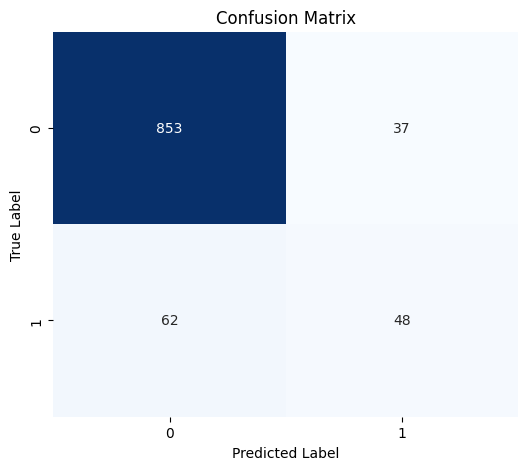

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tạo Confusion Matrix
conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)

# Trực quan hóa
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


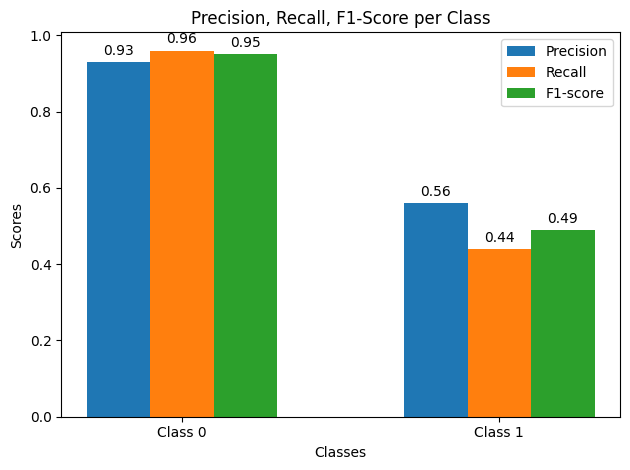

In [41]:
import numpy as np

# Giá trị các chỉ số
precision = [0.93, 0.56]  # precision của từng lớp
recall = [0.96, 0.44]     # recall của từng lớp
f1_score = [0.95, 0.49]   # F1-score của từng lớp

# Danh sách các lớp
classes = ['Class 0', 'Class 1']

# Tạo biểu đồ
x = np.arange(len(classes))  # Vị trí của các lớp
width = 0.2  # Độ rộng của cột

# Tạo figure và các cột
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score per Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Hiển thị giá trị trên các cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
